In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('zomato_1.csv')
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari


In [3]:
df.shape

(51042, 11)

In [4]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [5]:
df.nunique()

name                           8723
online_order                      2
book_table                        2
rate                             32
votes                          2326
location                         93
rest_type                        93
cuisines                       2704
approx_cost(for two people)      70
listed_in(type)                   7
listed_in(city)                  30
dtype: int64

**Trying to create new variable- as others have many unique values**

In [6]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [7]:
# Define a mapping of listed types to type of restaurant
type_to_type_of_rest = {
    'Buffet': 'Casual Dining',
    'Cafes': 'Casual Dining',
    'Dine-out': 'Casual Dining',
    'Delivery': 'Quick Service',
    'Desserts': 'Quick Service',
    'Drinks & nightlife': 'Night Life',
    'Pubs and bars': 'Night Life'
}

# Map the 'listed_in(type)' values to 'type_of_rest'
df['type_of_rest'] = df['listed_in(type)'].map(type_to_type_of_rest)

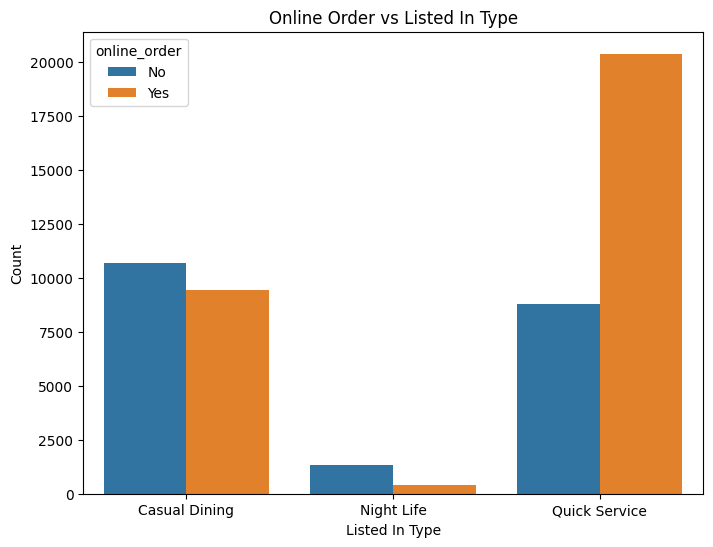

In [21]:
# Bar plot for 'listed_in(type)'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type_of_rest', hue='online_order')
plt.title("Online Order vs Listed In Type")
plt.xlabel("Listed In Type")
plt.ylabel("Count")
plt.show()

In [8]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [9]:
# Lists of locations
north_bengaluru = ['Rajajinagar', 'New BEL Road', 'Malleshwaram', 'Kammanahalli', 'Kalyan Nagar', 'Indiranagar']
south_bengaluru = ['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Whitefield', 'Sarjapur Road', 'BTM', 'Electronic City', 'Marathahalli', 'Koramangala 4th Block', 'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'JP Nagar', 'Jayanagar', 'HSR', 'Brookefield']
central_bengaluru = ['Brigade Road', 'Residency Road', 'Church Street', 'Old Airport Road', 'MG Road', 'Lavelle Road', 'Frazer Town']

# Function to categorize locations
def categorize_location(row):
    if row['listed_in(city)'] in north_bengaluru:
        return 'north_bengaluru'
    elif row['listed_in(city)'] in south_bengaluru:
        return 'south_bengaluru'
    elif row['listed_in(city)'] in central_bengaluru:
        return 'central_bengaluru'
    else:
        return 'other'  # Add this line if you want to handle other cases

# Apply the function to create a new column
df['location_type'] = df.apply(categorize_location, axis=1)

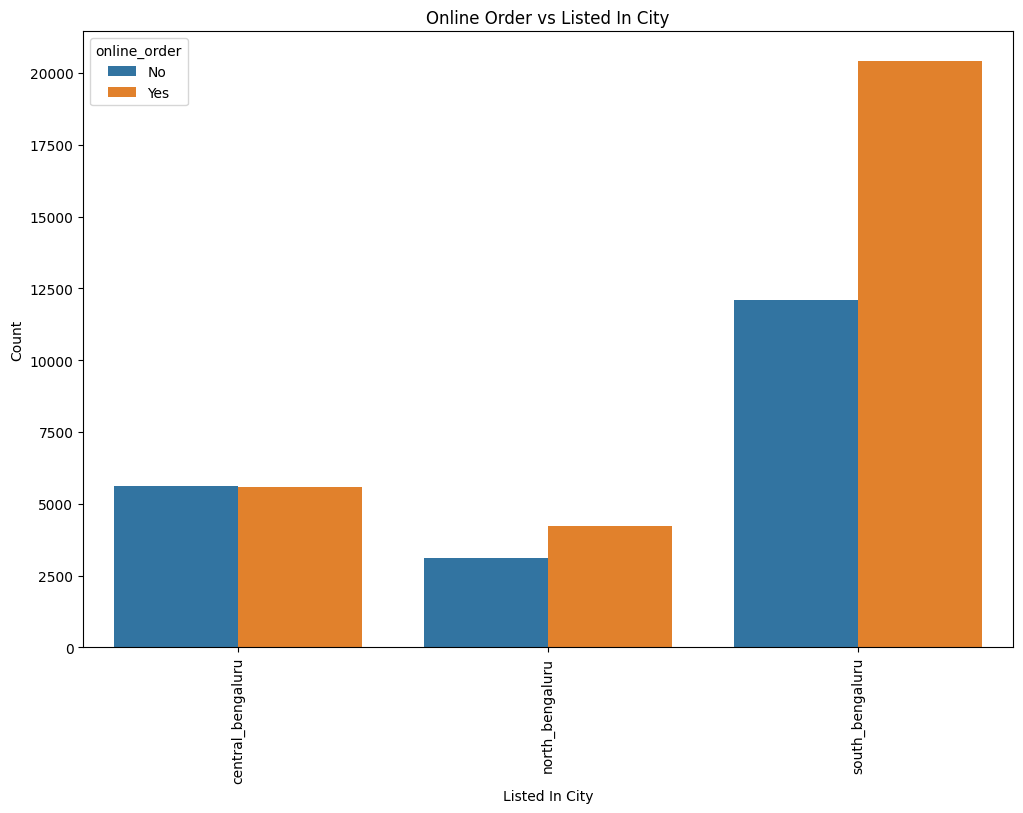

In [22]:
# Bar plot for 'listed_in(city)'
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='location_type', hue='online_order')
plt.title("Online Order vs Listed In City")
plt.xlabel("Listed In City")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Dropping redundant columns

In [10]:
# Define the columns to drop
columns_to_drop = ['name', 'listed_in(type)', 'listed_in(city)', 'cuisines','location','rest_type']

# Drop the specified columns in-place
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Changing Data Types-if required

In [11]:
df.dtypes

online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)    float64
type_of_rest                    object
location_type                   object
dtype: object

In [12]:
# Define the columns to change to 'category' data type
columns_to_change = ['online_order', 'book_table', 'location_type', 'type_of_rest']

# Convert the specified columns to 'category' data type
df[columns_to_change] = df[columns_to_change].astype('category')

**Recheck the data types after the conversion**

In [13]:
df.dtypes

online_order                   category
book_table                     category
rate                            float64
votes                             int64
approx_cost(for two people)     float64
type_of_rest                   category
location_type                  category
dtype: object

# Summary Statistics

**For numerical variables**

In [15]:
df.describe()

,rate,votes,approx_cost(for two people)
count,51042.000000,51042.000000,51042.000000
mean,3.701484,284.507700,555.782983
std,0.395197,805.927478,439.293333
min,1.800000,0.000000,40.000000
25%,3.500000,7.000000,300.000000
50%,3.700449,41.000000,400.000000
75%,3.900000,199.000000,700.000000
max,4.900000,16832.000000,6000.000000


**For categorical features**

In [16]:
df.describe(include = 'category')

,online_order,book_table,type_of_rest,location_type
count,51042,51042,51042,51042
unique,2,2,3,3
top,Yes,No,Quick Service,south_bengaluru
freq,30228,44626,29138,32509


# Outlier Treatment

**Treatment of Votes columns**

In [18]:
Q1 = df['votes'].quantile(0.25)
Q3 = df['votes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers in 'votes' column
df['votes'] = df['votes'].apply(lambda x: upper_bound if x > upper_bound else x)
df['votes'] = df['votes'].apply(lambda x: lower_bound if x < lower_bound else x)

**Treatment of Rate columns**

In [19]:
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers in 'votes' column
df['rate'] = df['rate'].apply(lambda x: upper_bound if x > upper_bound else x)
df['rate'] = df['rate'].apply(lambda x: lower_bound if x < lower_bound else x)

# VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df' is your DataFrame containing the Zomato dataset

# Extract the columns for which you want to calculate VIF
columns_to_check = ['rate', 'votes', 'approx_cost(for two people)']

# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["feature"] = columns_to_check
vif_data["VIF"] = [variance_inflation_factor(df[columns_to_check].values, i) for i in range(len(columns_to_check))]

# Print the VIF values
print(vif_data)

                       feature       VIF
0                         rate  2.832734
1                        votes  1.306828
2  approx_cost(for two people)  3.181675


# Class Imbalance

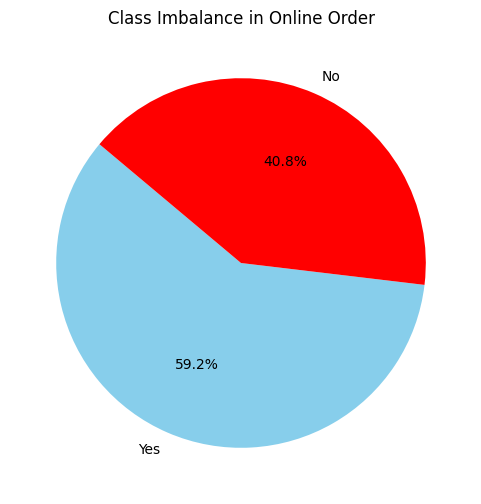

In [35]:
# Count the occurrences of each class in the 'online_order' column
class_counts = df['online_order'].value_counts()

# Create a pie chart with percentages
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'red'])
plt.title("Class Imbalance in Online Order")
plt.show()

# Logistic regression model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import statsmodels.api as sm
selected_columns = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'type_of_rest', 'location_type']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Convert categorical columns to dummy variables
df_selected = pd.get_dummies(df_selected, columns=['online_order', 'book_table', 'type_of_rest', 'location_type'], drop_first=True)

# Define X (features) and y (target)
X = df_selected.drop('online_order_Yes', axis=1)  # Drop one level to avoid multicollinearity
y = df_selected['online_order_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# Print model summary
print(logit_model.summary())

# Predict on test set
y_pred = logit_model.predict(sm.add_constant(X_test))
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


C:\Users\patha\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\patha\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                           Logit Regression Results                           
Dep. Variable:       online_order_Yes   No. Observations:                40833
Model:                          Logit   Df Residuals:                    40824
Method:                           MLE   Df Model:                            8
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                     inf
Time:                        12:45:05   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2710      0.136      1.995      0.046       0.005       0.537
rate                             -0.2412      0.037     -6.482      0.000 

In [38]:
# Predict on test set
y_pred = logit_model.predict(sm.add_constant(X_test))
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.50      0.56      4169
           1       0.70      0.80      0.75      6040

    accuracy                           0.68     10209
   macro avg       0.67      0.65      0.65     10209
weighted avg       0.67      0.68      0.67     10209



In [39]:
# Predict on test set
y_pred = logit_model.predict(sm.add_constant(X_test))
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.50      0.56      4169
           1       0.70      0.80      0.75      6040

    accuracy                           0.68     10209
   macro avg       0.67      0.65      0.65     10209
weighted avg       0.67      0.68      0.67     10209



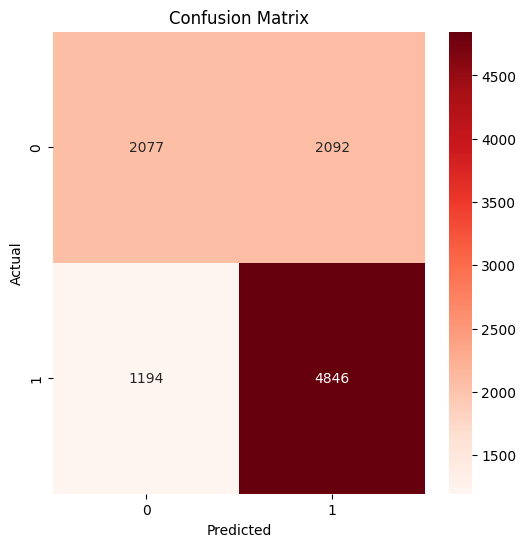

In [42]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

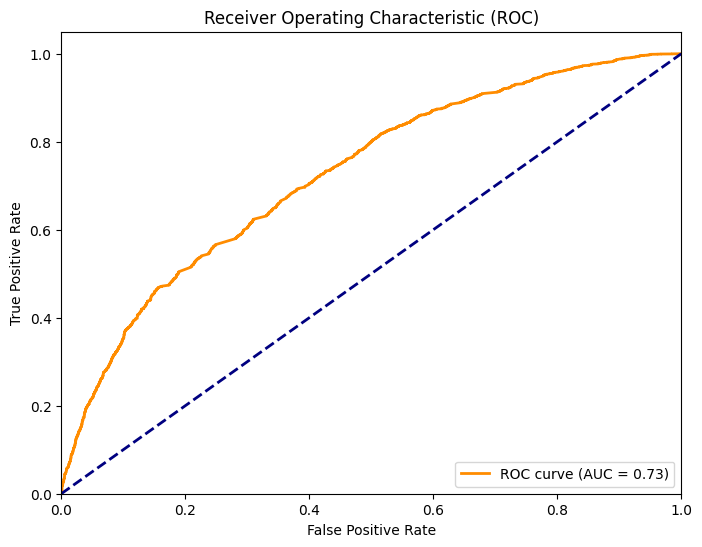

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# KNN

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

selected_columns = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'type_of_rest', 'location_type']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Convert categorical columns to dummy variables
df_selected = pd.get_dummies(df_selected, columns=['online_order', 'book_table', 'type_of_rest', 'location_type'], drop_first=True)

# Define X (features) and y (target)
X = df_selected.drop('online_order_Yes', axis=1)  # Drop one level to avoid multicollinearity
y = df_selected['online_order_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn_model.predict(X_test_scaled)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      4169
           1       0.81      0.82      0.81      6040

    accuracy                           0.78     10209
   macro avg       0.77      0.77      0.77     10209
weighted avg       0.78      0.78      0.78     10209



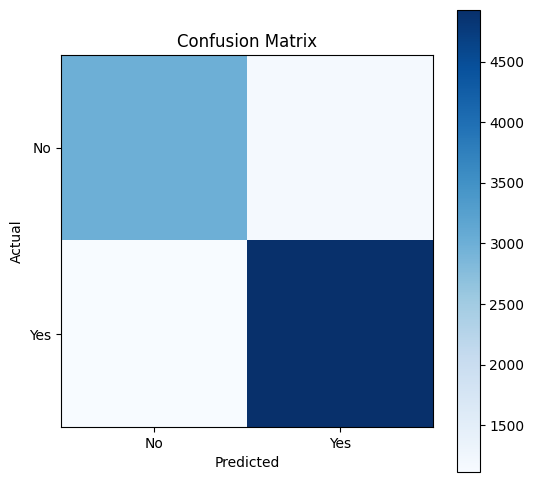

In [45]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.colorbar()
plt.show()

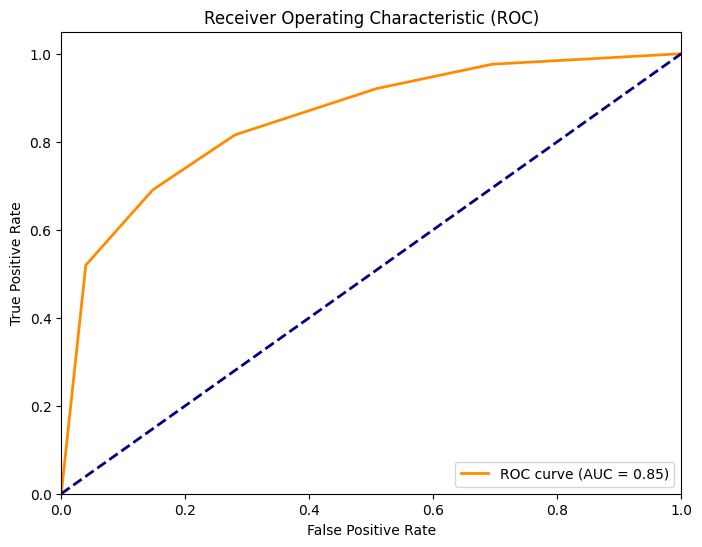

In [46]:
 #Calculate ROC curve and AUC
y_pred_prob = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes Classifier

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

selected_columns = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'type_of_rest', 'location_type']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Convert categorical columns to dummy variables
df_selected = pd.get_dummies(df_selected, columns=['online_order', 'book_table', 'type_of_rest', 'location_type'], drop_first=True)

# Define X (features) and y (target)
X = df_selected.drop('online_order_Yes', axis=1)  # Drop one level to avoid multicollinearity
y = df_selected['online_order_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Predict on test set
y_pred = naive_bayes_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.17      0.28      4169
           1       0.62      0.94      0.75      6040

    accuracy                           0.63     10209
   macro avg       0.65      0.56      0.51     10209
weighted avg       0.65      0.63      0.56     10209



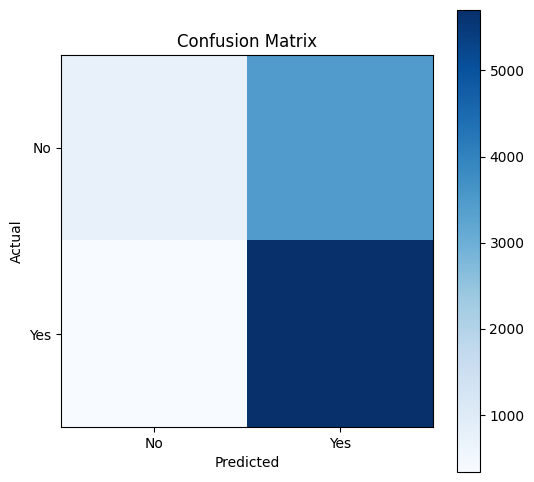

In [48]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.colorbar()
plt.show()

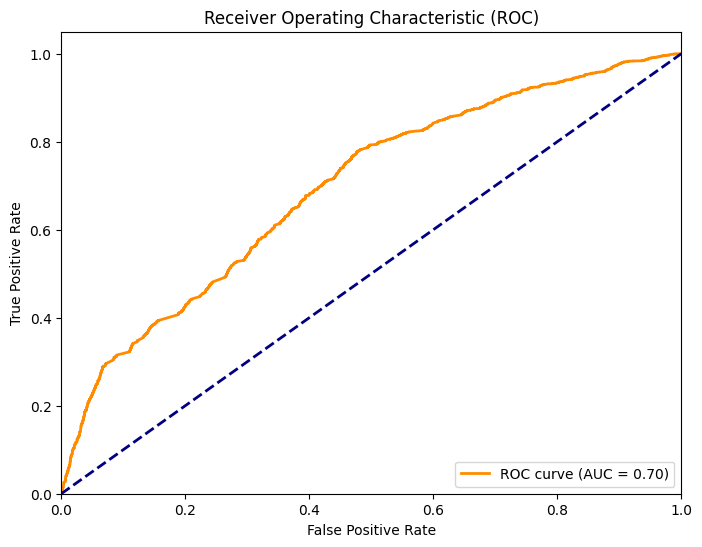

In [49]:
# Calculate ROC curve and AUC
y_pred_prob = naive_bayes_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Zomato dataset

# Select columns for the model
selected_columns = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'type_of_rest', 'location_type']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Convert categorical columns to dummy variables
df_selected = pd.get_dummies(df_selected, columns=['online_order', 'book_table', 'type_of_rest', 'location_type'], drop_first=True)

# Define X (features) and y (target)
X = df_selected.drop('online_order_Yes', axis=1)  # Drop one level to avoid multicollinearity
y = df_selected['online_order_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on test set
y_pred = decision_tree_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      4169
           1       0.88      0.81      0.84      6040

    accuracy                           0.82     10209
   macro avg       0.82      0.83      0.82     10209
weighted avg       0.83      0.82      0.82     10209



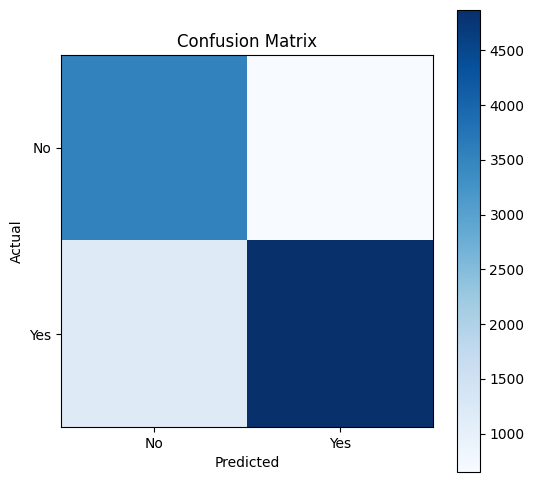

In [51]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.colorbar()
plt.show()

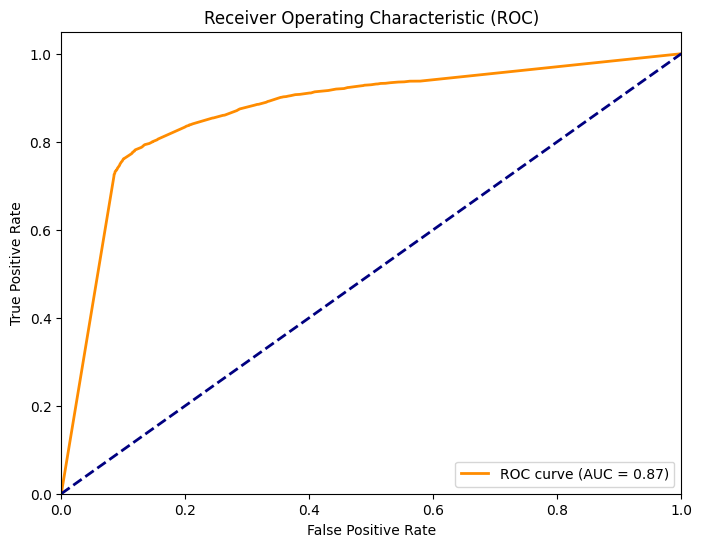

In [55]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [56]:
selected_columns = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'type_of_rest', 'location_type']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Convert categorical columns to dummy variables
df_selected = pd.get_dummies(df_selected, columns=['online_order', 'book_table', 'type_of_rest', 'location_type'], drop_first=True)

# Define X (features) and y (target)
X = df_selected.drop('online_order_Yes', axis=1)  # Drop one level to avoid multicollinearity
y = df_selected['online_order_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree models using Gini and Entropy criteria
decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit models
decision_tree_gini.fit(X_train, y_train)
decision_tree_entropy.fit(X_train, y_train)

# Predict on test set for both models
y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_entropy = decision_tree_entropy.predict(X_test)

# Compare model performance
print("Gini Impurity:")
print("Classification Report:\n", classification_report(y_test, y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("AUC Score:", roc_auc_score(y_test, decision_tree_gini.predict_proba(X_test)[:, 1]))

print("\nEntropy:")
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("AUC Score:", roc_auc_score(y_test, decision_tree_entropy.predict_proba(X_test)[:, 1]))

Gini Impurity:
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      4169
           1       0.88      0.81      0.84      6040

    accuracy                           0.82     10209
   macro avg       0.82      0.83      0.82     10209
weighted avg       0.83      0.82      0.82     10209

Confusion Matrix:
 [[3519  650]
 [1172 4868]]
AUC Score: 0.870988484859075

Entropy:
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      4169
           1       0.88      0.81      0.84      6040

    accuracy                           0.82     10209
   macro avg       0.82      0.83      0.82     10209
weighted avg       0.83      0.82      0.82     10209

Confusion Matrix:
 [[3500  669]
 [1142 4898]]
AUC Score: 0.8726010851141903


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Select columns for the model
selected_columns = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'type_of_rest', 'location_type']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Convert categorical columns to dummy variables
df_selected = pd.get_dummies(df_selected, columns=['online_order', 'book_table', 'type_of_rest', 'location_type'], drop_first=True)

# Define X (features) and y (target)
X = df_selected.drop('online_order_Yes', axis=1)  # Drop one level to avoid multicollinearity
y = df_selected['online_order_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on test set
y_pred = random_forest_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      4169
           1       0.87      0.84      0.85      6040

    accuracy                           0.83     10209
   macro avg       0.82      0.83      0.83     10209
weighted avg       0.83      0.83      0.83     10209



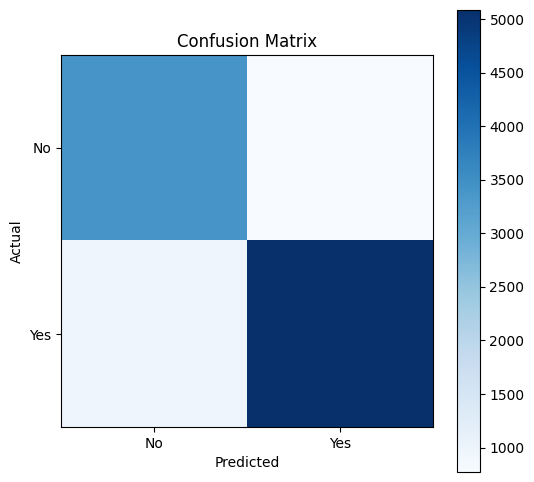

In [58]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.colorbar()
plt.show()

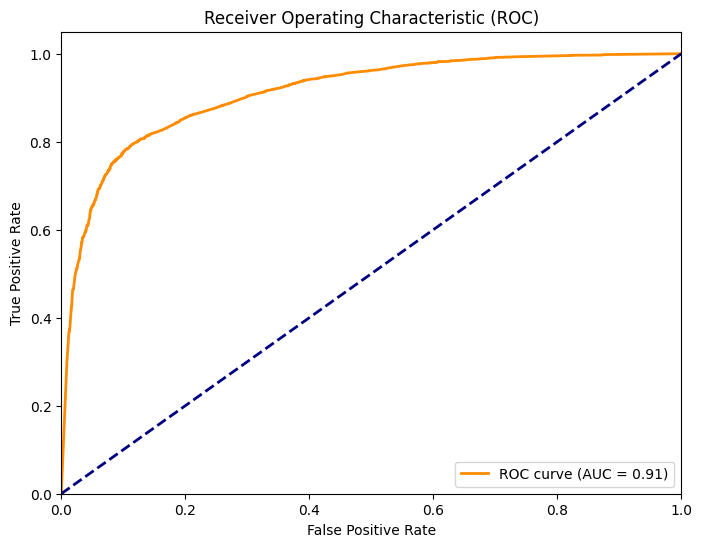

In [59]:
# Calculate ROC curve and AUC
y_pred_prob = random_forest_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# ADA Boosting

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Zomato dataset

# Select columns for the model
selected_columns = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'type_of_rest', 'location_type']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Convert categorical columns to dummy variables
df_selected = pd.get_dummies(df_selected, columns=['online_order', 'book_table', 'type_of_rest', 'location_type'], drop_first=True)

# Define X (features) and y (target)
X = df_selected.drop('online_order_Yes', axis=1)  # Drop one level to avoid multicollinearity
y = df_selected['online_order_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

# Predict on test set
y_pred = adaboost_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66      4169
           1       0.76      0.80      0.78      6040

    accuracy                           0.73     10209
   macro avg       0.72      0.72      0.72     10209
weighted avg       0.73      0.73      0.73     10209



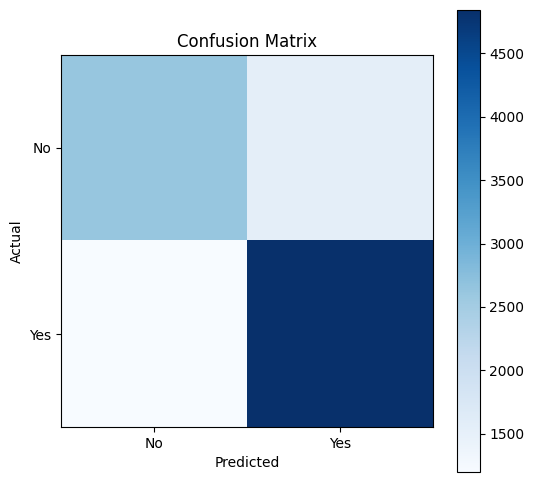

In [61]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.colorbar()
plt.show()

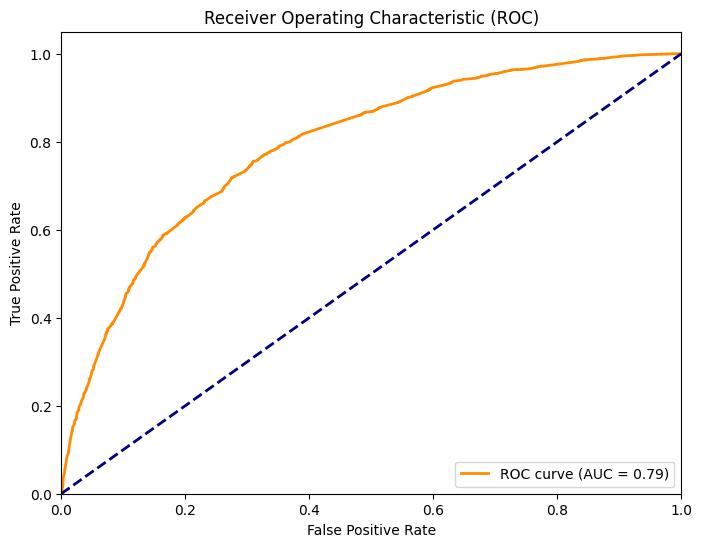

In [62]:
# Calculate ROC curve and AUC
y_pred_prob = adaboost_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
selected_columns = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'type_of_rest', 'location_type']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Convert categorical columns to dummy variables
df_selected = pd.get_dummies(df_selected, columns=['online_order', 'book_table', 'type_of_rest', 'location_type'], drop_first=True)

# Define X (features) and y (target)
X = df_selected.drop('online_order_Yes', axis=1)  # Drop one level to avoid multicollinearity
y = df_selected['online_order_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Predict on test set
y_pred = gradient_boosting_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67      4169
           1       0.77      0.80      0.78      6040

    accuracy                           0.74     10209
   macro avg       0.73      0.72      0.73     10209
weighted avg       0.74      0.74      0.74     10209



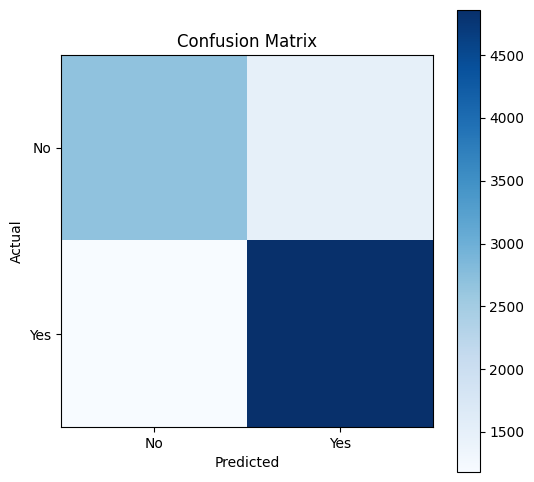

In [64]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.colorbar()
plt.show()

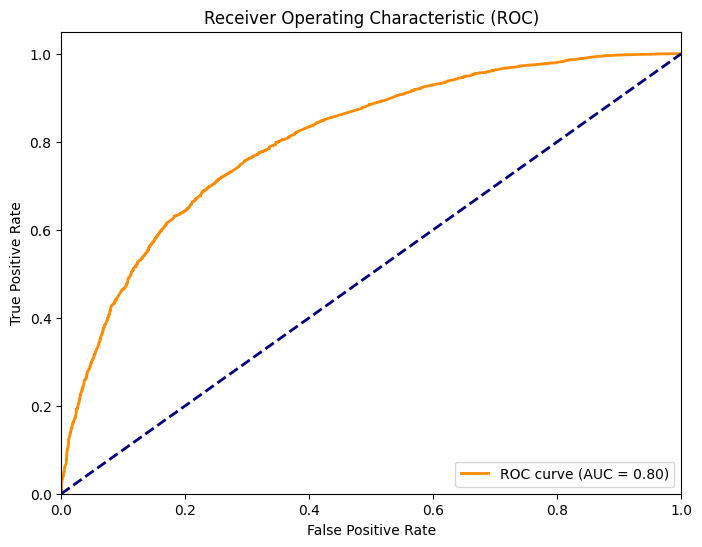

In [65]:
# Calculate ROC curve and AUC
y_pred_prob = gradient_boosting_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# XG Boosting

In [66]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Zomato dataset

# Select columns for the model
selected_columns = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'type_of_rest', 'location_type']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Convert categorical columns to dummy variables
df_selected = pd.get_dummies(df_selected, columns=['online_order', 'book_table', 'type_of_rest', 'location_type'], drop_first=True)

# Define X (features) and y (target)
X = df_selected.drop('online_order_Yes', axis=1)  # Drop one level to avoid multicollinearity
y = df_selected['online_order_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      4169
           1       0.81      0.84      0.83      6040

    accuracy                           0.79     10209
   macro avg       0.79      0.78      0.78     10209
weighted avg       0.79      0.79      0.79     10209



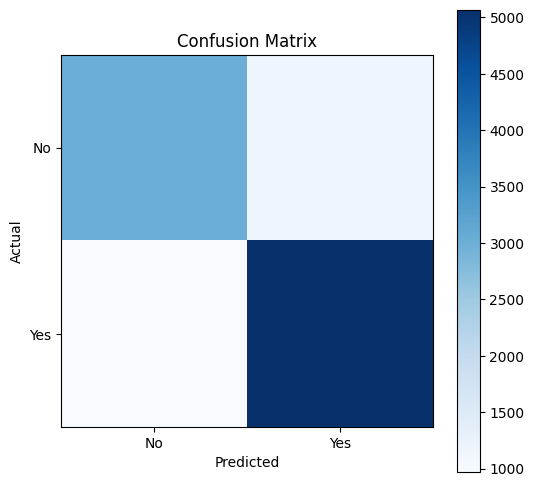

In [67]:
#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.colorbar()
plt.show()

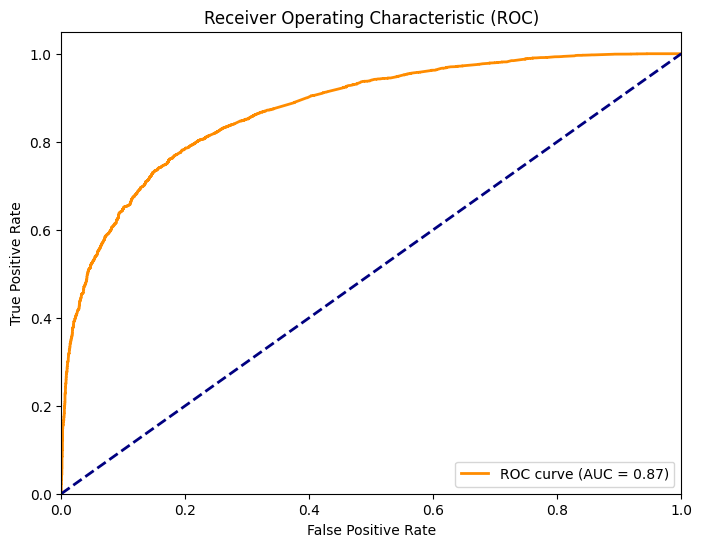

In [68]:

# Calculate ROC curve and AUC
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

--Random Forest -83%